In [1]:
# create a dataframe from the following data
# category_id	category_name	num_images
# 0	1	person	4908
# 1	67	dining table	2640
# 2	62	chair	2474
# 3	3	car	2337
# 4	51	bowl	2002
# 5	47	cup	1958
# 6	44	bottle	1954
# 7	84	book	1800
# 8	10	traffic light	1300
# 9	31	handbag	942


import pandas as pd
from io import StringIO
data = """category_id,category_name,num_images
1,person,4908
67,dining table,2640
62,chair,2474
3,car,2337
51,bowl,2002
47,cup,1958
44,bottle,1954
84,book,1800
10,traffic light,1300
31,handbag,942"""

# Use StringIO to simulate a file-like object
data_io = StringIO(data)
# Read the CSV data into a DataFrame
df = pd.read_csv(data_io)
# Display the DataFrame
print(df)

   category_id  category_name  num_images
0            1         person        4908
1           67   dining table        2640
2           62          chair        2474
3            3            car        2337
4           51           bowl        2002
5           47            cup        1958
6           44         bottle        1954
7           84           book        1800
8           10  traffic light        1300
9           31        handbag         942


In [2]:
# show the percentages of each category

df['percentage'] = df['num_images'] / df['num_images'].sum() * 100
# Display the DataFrame with percentages
print(df)

   category_id  category_name  num_images  percentage
0            1         person        4908   21.994174
1           67   dining table        2640   11.830607
2           62          chair        2474   11.086713
3            3            car        2337   10.472776
4           51           bowl        2002    8.971544
5           47            cup        1958    8.774367
6           44         bottle        1954    8.756442
7           84           book        1800    8.066323
8           10  traffic light        1300    5.825678
9           31        handbag         942    4.221376


In [19]:
# total number of images
total_images = df['num_images'].sum()
total_images

np.int64(22315)

TODO: compute the label distribution

In [5]:
from pathlib import Path

dataset_dir = Path('dataset/coco_top10_filtered_20250423')

label_per_obj_train_top10_v2_path  = dataset_dir / 'label_per_obj_train_top10_v2.pkl'

In [ ]:
import pickle

label_per_obj_train_top10_v2 = pickle.load(open(label_per_obj_train_top10_v2_path, 'rb'))

[44,
 44,
 44,
 44,
 51,
 44,
 44,
 44,
 44,
 44,
 44,
 1,
 1,
 51,
 47,
 44,
 47,
 47,
 47,
 47,
 51,
 51,
 51,
 47,
 47,
 47,
 44,
 84,
 84,
 84,
 67,
 84,
 84,
 84,
 84,
 44,
 44,
 47,
 51,
 47,
 47,
 44,
 44,
 44,
 51,
 51,
 51,
 44,
 44,
 51,
 84,
 44,
 44,
 44,
 67,
 62,
 62,
 62,
 67,
 84,
 84,
 84,
 84,
 62,
 62,
 62,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 44,
 44,
 62,
 44,
 44,
 47,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 10,
 3,
 3,
 44,
 44,
 44,
 44,
 44,
 44,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 44,
 44,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 47,
 47,
 84,
 84,
 3,
 3,
 3,
 3,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 10,
 10,
 3,
 3,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1,
 10,
 10,
 84,
 84,
 84,
 84,
 84,
 84,
 10,
 10,
 10,
 10,
 10,
 10,
 51,
 44,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 3,
 10,
 3,
 1,
 1,
 1,
 1,
 1,
 84,
 1,
 62,
 62,
 62,
 47,
 3,
 3,
 

In [9]:
# count the number of images per category
category_counts = {}
for label in label_per_obj_train_top10_v2:
    category_id = label
    if category_id not in category_counts:
        category_counts[category_id] = 0
    category_counts[category_id] += 1

# Create a DataFrame from the category counts
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['category_id', 'num_labels'])

category_counts_df

,category_id,num_labels
0,44,5368
1,51,3457
2,1,19417
3,47,3673
4,84,8459
5,67,3016
6,62,5753
7,10,3714
8,3,8028
9,31,1559


In [13]:
category_counts_df.sort_values('num_labels', ascending=False, inplace=True)

# merge the category names based on category_id
category_counts_df = category_counts_df.merge(df[['category_id', 'category_name']], on='category_id', how='left')

category_counts_df

,category_id,num_labels,category_name
0,1,19417,person
1,84,8459,book
2,3,8028,car
3,62,5753,chair
4,44,5368,bottle
5,10,3714,traffic light
6,47,3673,cup
7,51,3457,bowl
8,67,3016,dining table
9,31,1559,handbag


In [16]:
# compute percentage

category_counts_df['percentage'] = category_counts_df['num_labels'] / category_counts_df['num_labels'].sum() * 100

category_counts_df

,category_id,num_labels,category_name,percentage
0,1,19417,person,31.095061
1,84,8459,book,13.546538
2,3,8028,car,12.856319
3,62,5753,chair,9.213055
4,44,5368,bottle,8.596502
5,10,3714,traffic light,5.947729
6,47,3673,cup,5.882070
7,51,3457,bowl,5.536160
8,67,3016,dining table,4.829928
9,31,1559,handbag,2.496637


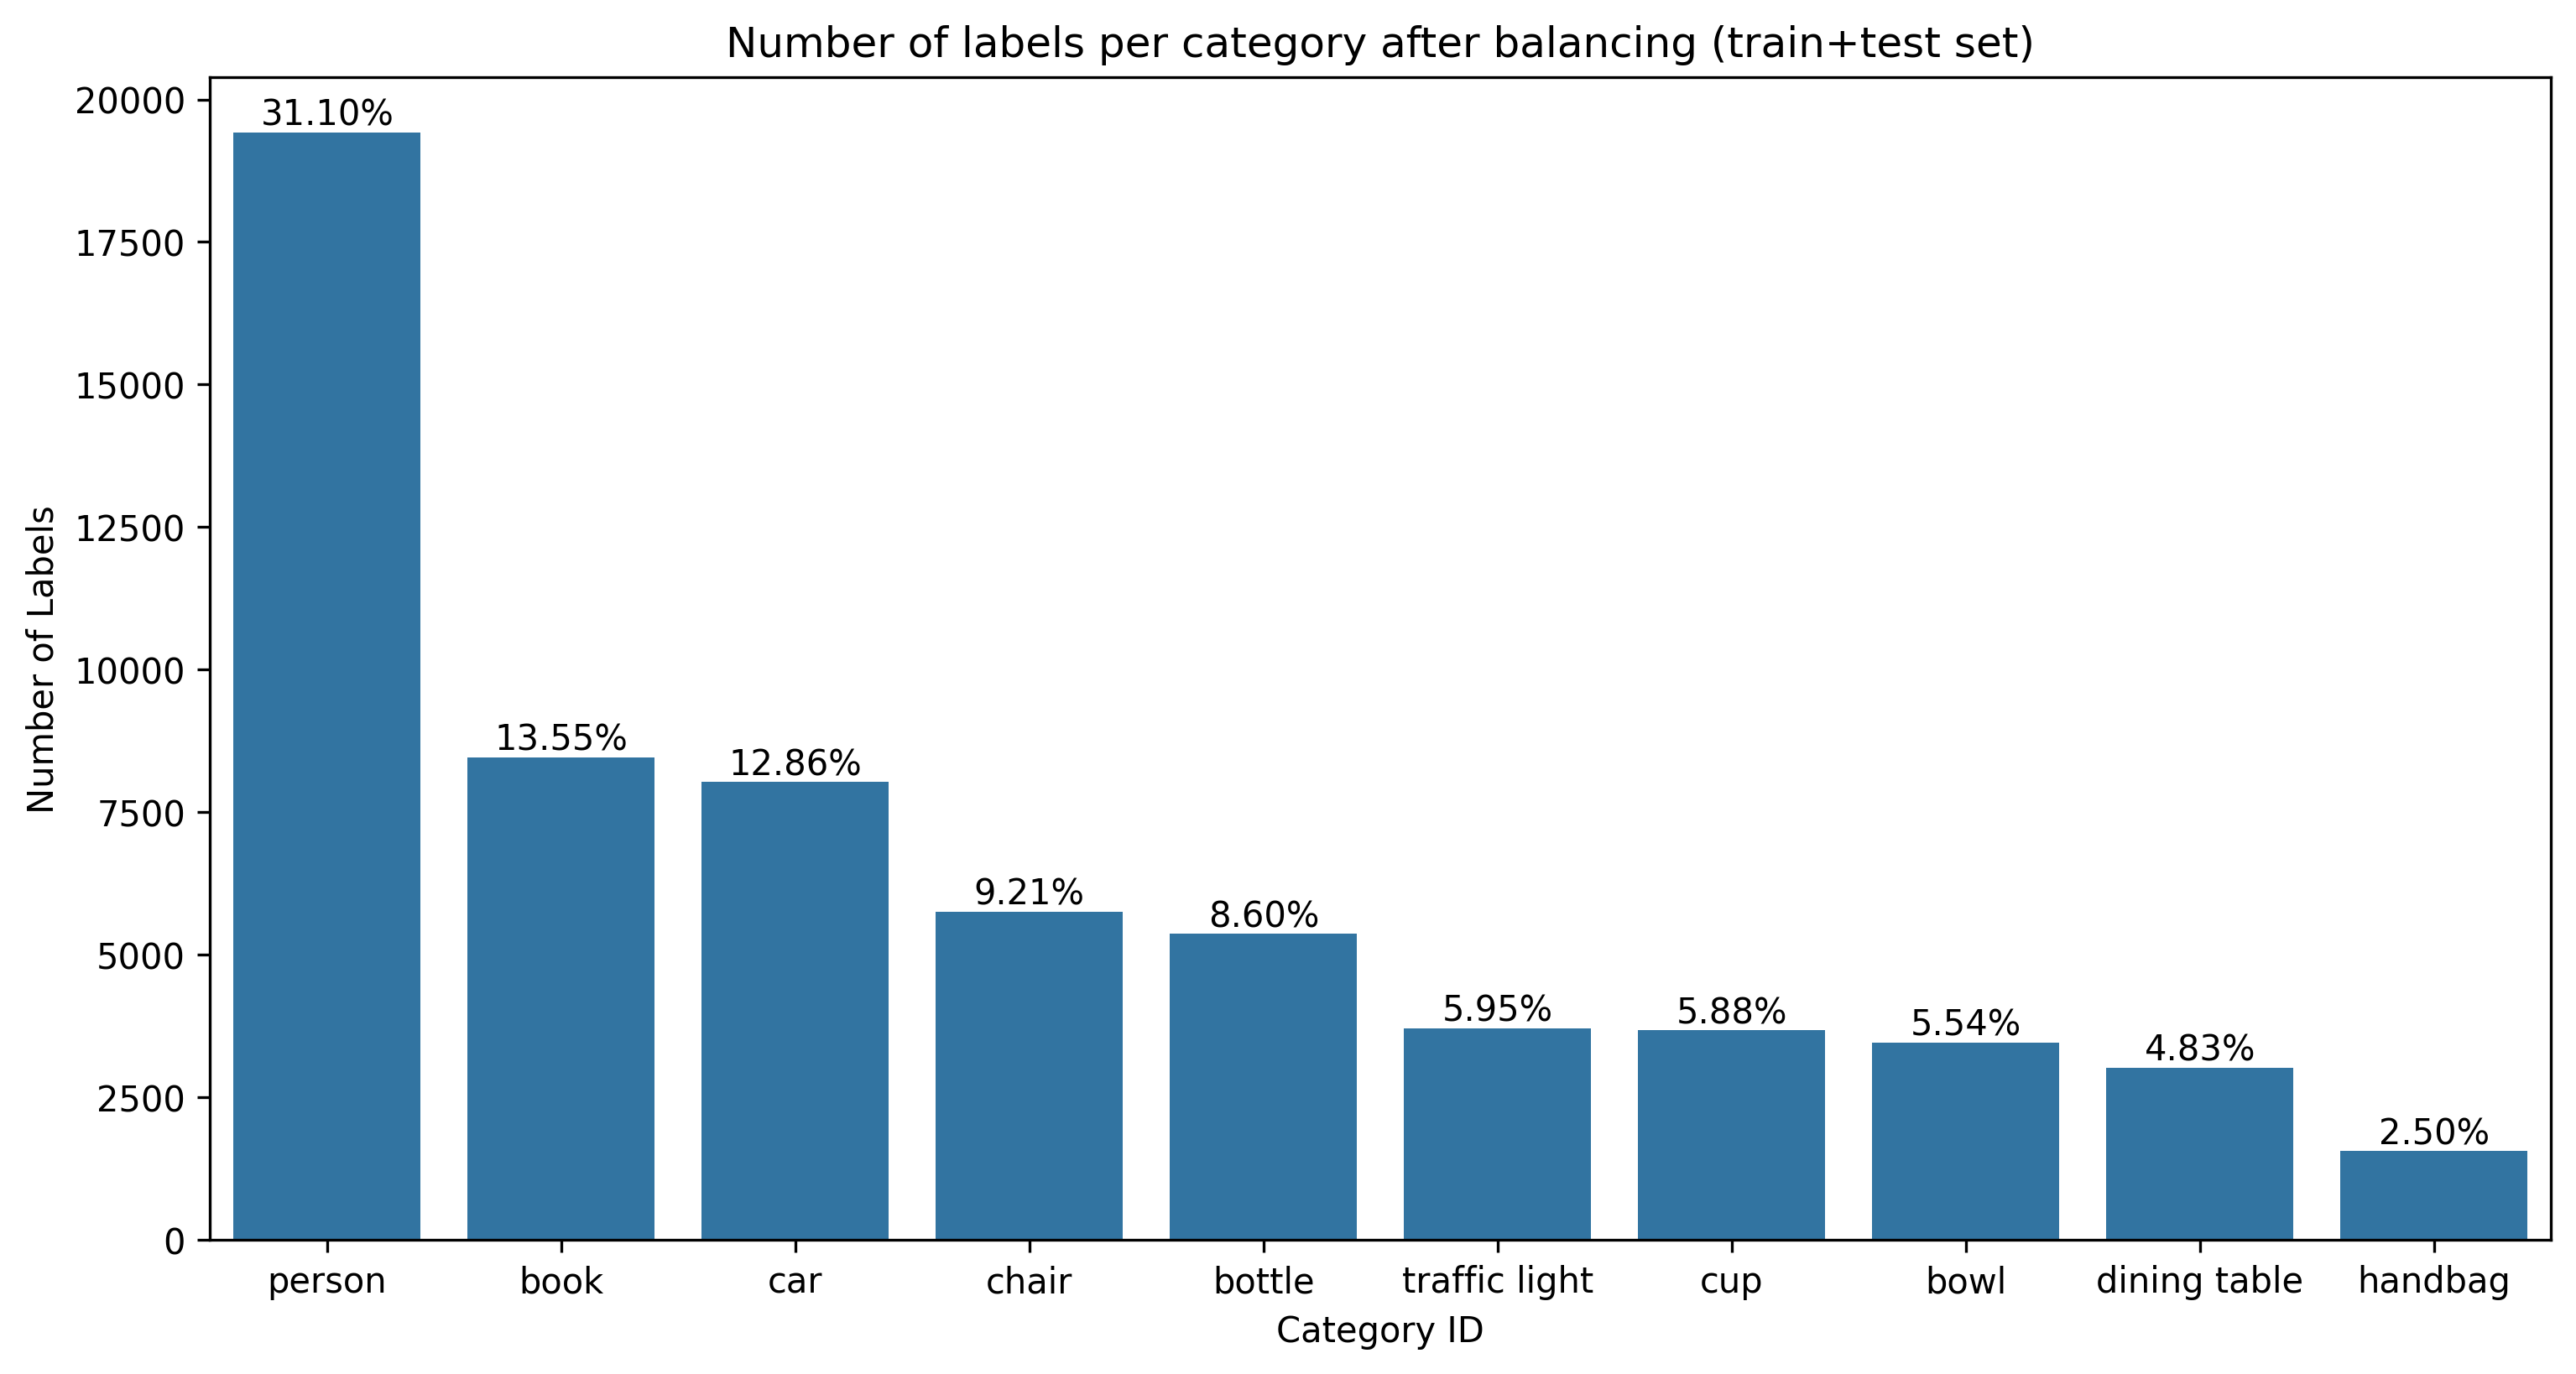

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts_df.sort_values('num_labels', ascending=False, inplace=True)

# plot the category counts as bar plot, in descending order
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x='category_name', y='num_labels', data=category_counts_df.sort_values('num_labels', ascending=False))
plt.title('Number of labels per category after balancing (train+test set)')
plt.xlabel('Category ID')
plt.ylabel('Number of Labels')
# show the percentage on top of the bars
for index, row in category_counts_df.iterrows():
    plt.text(index, row['num_labels'], f"{row['percentage']:.2f}%", color='black', ha="center", va="bottom")
plt.show()


In [20]:
# sum of labels
sum_labels = category_counts_df['num_labels'].sum()
sum_labels

np.int64(62444)